<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Estadistica Descriptiva

⚠️ Siempre que puedas usa graficas para apoyar tu interpretacion


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np  
import pandas as pd 


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# librerias para estadisticas 
# ------------------------------------------------------------------------------

import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 

# Vamos a importar desde src porque las cosas se hacen bien
# ------------------------------------------------------------------------------
import sys 
sys.path.append("../")
from src.SupportLab import (
    media_mediana_y_moda
)

#### Ejercicio 1: 

1.  Dados los siguientes datos: [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]. Crea una funcion que calcule la media, mediana y moda.


In [2]:
datos =  [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]
media_mediana_y_moda(datos)

La media es: 38.8
La Mediana es: 40.0
La moda es: [50]


In [3]:
datos =  [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]
print(np.mean(datos))
print(np.median(datos))
print(stats.mode(datos))


38.8
40.0
ModeResult(mode=np.int64(50), count=np.int64(2))


2.	Interpretación de la media: ¿Qué sucede si un valor extremo, como 100, se agrega al conjunto de datos anterior? ¿Cómo cambia la media? Explica por qué sucede esto.

La media cambia drásticamente de 38.8 a 44.37 esto sucede porque la media se calcula sumando todos los valores y diviendo entre la cantidad de los mismos, esto hace que cuando tenemos valores extremos, la media puede no representar la realidad correctamente de los valores que tenemos.

In [4]:
datos =  [15, 21, 25, 32, 35, 45, 50, 50, 55, 60,100]
media_mediana_y_moda(datos)

La media es: 44.36363636363637
La Mediana es: 45
La moda es: [50]



#### Ejercicio 2: 
1. **Cálculo de la varianza y desviación estándar**: Usando los mismos datos de arriba, calcula la **varianza** y la **desviación estándar**.




In [5]:
datos =  [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]
df = pd.DataFrame(datos)
print(df.std())
print(df.var())
print(np.std(datos,ddof=1))
print(np.var(datos,ddof=1))


0    15.404184
dtype: float64
0    237.288889
dtype: float64
15.404184135775868
237.2888888888889


2. **Comparación de dispersión**: Dado otro conjunto de datos: `[18, 19, 20, 22, 24, 25, 27, 30]`, compara la **dispersión** de este grupo con el conjunto de datos anterior (del Ejercicio 1) calculando la **desviación estándar** de ambos. ¿Qué conjunto tiene mayor dispersión?

In [6]:
datos2 = [18, 19, 20, 22, 24, 25, 27, 30]
df2 = pd.DataFrame(datos2)
print(df2.std())
print(df2.var())
print(np.std(datos2,ddof=1))
print(np.var(datos2,ddof=1))

0    4.155461
dtype: float64
0    17.267857
dtype: float64
4.155461122770509
17.267857142857142


El Conjunto con mayor dispersion es el primero

#### Ejercicio 3:

1. Usa la función correspondiente en Python para calcular la **asimetría** del conjunto de datos: `[10, 20, 20, 20, 25, 30, 35, 40]`. 


In [7]:
datos = [10, 20, 20, 20, 25, 30, 35, 40]
skew(datos)

np.float64(0.1280077375904375)

2. Interpreta el resultado: ¿El conjunto es simétrico, sesgado a la izquierda o a la derecha?

<Axes: ylabel='Density'>

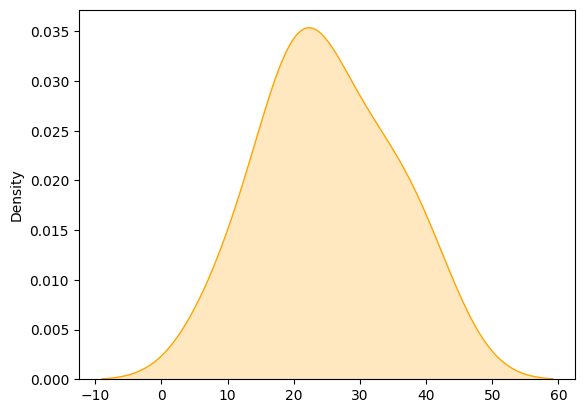

In [8]:
sns.kdeplot(datos,fill=True,color="Orange")

Sesgo hacia la derecha, muy leve, es casi simétrica


#### Ejercicio 4: 

1. Calcula la **curtosis** para el conjunto de datos: `[5, 5, 5, 20, 25, 30, 30, 50]`. 

In [40]:
datos = [5, 5, 5, 20, 25, 30, 30, 50]
kurtosis(datos)

np.float64(-0.7357817008166658)

2. ¿El conjunto tiene una curtosis positiva, negativa o es mesocúrtico? Explica qué implica esto sobre la forma de la distribución.

Es negativa, eso significa que tiene pocos valores extremos y la distribucion es más plana y ancha

#### Ejercicio 5: Caso practico. 


Imagina que una empresa está evaluando el rendimiento de sus empleados para entender la relación entre el tiempo que dedican a su trabajo y el éxito que tienen en términos de ventas. La empresa recopila datos durante un mes, midiendo cuántas **horas trabajó** cada empleado y cuántas **ventas realizaron**. Estos datosa se encuentran en el archivo `rendimiento.csv`

**Horas trabajadas**: 
   - Se midieron las horas trabajadas por un grupo de empleados. En general, la mayoría de los empleados trabajan entre 40 y 60 horas a la semana, con algunos empleados trabajando un poco menos o más.


**Ventas realizadas**:
   - A cada empleado también se le hizo un seguimiento de cuántas ventas realizó. Aunque las ventas están influenciadas por las horas trabajadas, hay cierta **variabilidad**: algunos empleados pueden ser más productivos y vender más en menos tiempo, mientras que otros necesitan trabajar más para alcanzar los mismos resultados.


Resuelve los siguientes puntos:



1. **Cálculo de la media, mediana y moda**:
   - Calcula la **media**, **mediana** y **moda** de las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - Explica qué información proporciona cada medida en este contexto. Justifica tus conclusiones con representación de graficas. 


In [11]:
df = pd.read_csv("datos/rendimiento.csv")
df.head()

,ID,Horas Trabajadas,Ventas Realizadas
0,1,54.967142,48.0
1,2,48.617357,47.0
2,3,56.476885,55.0
3,4,65.230299,61.0
4,5,47.658466,47.0



2. **Comparación de medidas de centralización**:
   - ¿Cómo se diferencian la media y la mediana para los datos de **Ventas Realizadas**? ¿Qué indica esta diferencia sobre la distribución de las ventas?


In [12]:
df["Ventas Realizadas"].mean()

np.float64(49.12)

In [13]:
df["Ventas Realizadas"].median()

np.float64(48.0)

Nos indica una distribución casi simétrica, con apenas valores atípicos 

3. **Cálculo de la varianza y desviación estándar**:
   - Calcula la **varianza** y la **desviación estándar** para las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - ¿Qué conjunto de datos es más disperso? Explica el significado de la dispersión en este caso. Justifica tus conclusiones con representación de graficas. 


#### Horas Trabajadas

In [14]:
df["Horas Trabajadas"].var()

np.float64(82.476989363016)

9.081684280078008


<Axes: xlabel='Horas Trabajadas', ylabel='Density'>

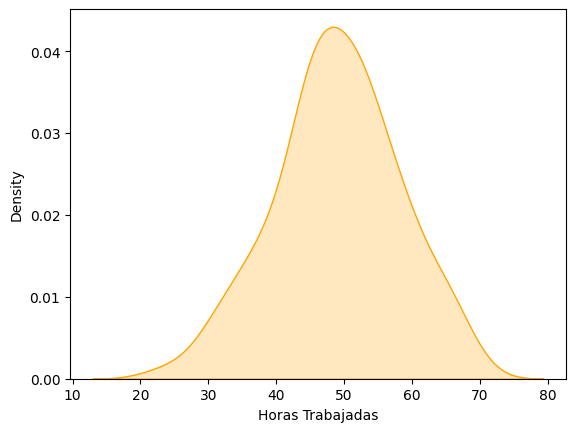

In [ ]:
df["Horas Trabajadas"].std()

#### Ventas Realizadas

In [16]:
df["Ventas Realizadas"].var()

np.float64(93.05616161616163)

In [17]:
df["Ventas Realizadas"].std()

np.float64(9.646562165671334)

Text(0, 0.5, 'Ventas Realizadas')

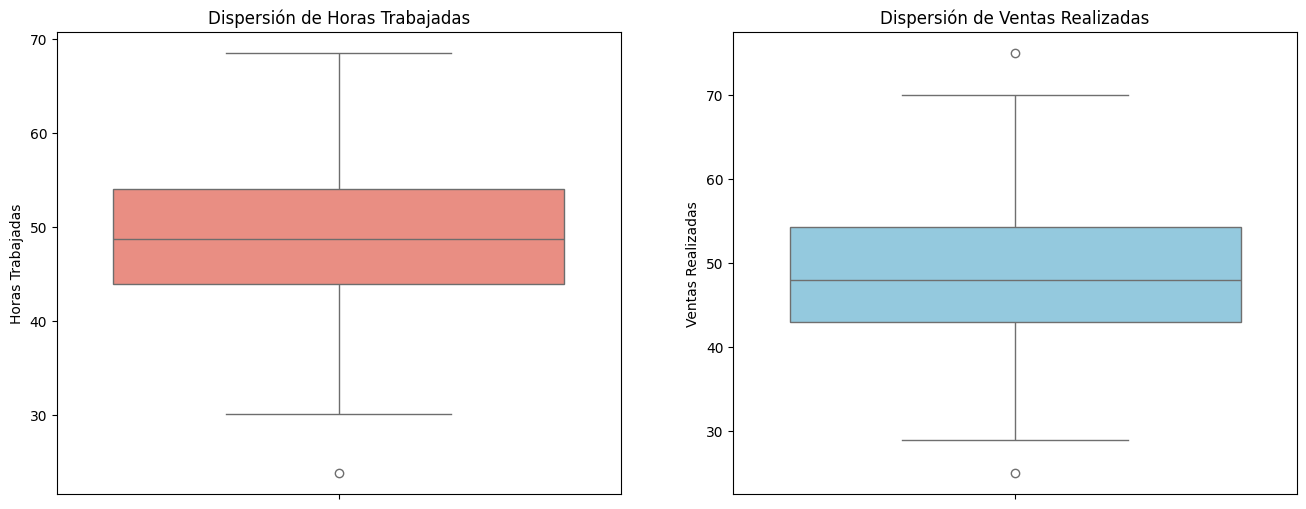

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y=df["Horas Trabajadas"], color="salmon", ax=axes[0])
axes[0].set_title("Dispersión de Horas Trabajadas")
axes[0].set_ylabel("Horas Trabajadas")

sns.boxplot(y=df["Ventas Realizadas"], color="skyblue", ax=axes[1])
axes[1].set_title("Dispersión de Ventas Realizadas")
axes[1].set_ylabel("Ventas Realizadas")

En este caso Horas trabajadas tiene menor dispersion, en este caso la dispersión se centra en la diferencia entre todas las horas trabajadas, los trabajadores han trabajado entre 9 horas mas o menos de la media de horas trabajadas

Lo mismo con las ventas

Pero son muy parecidos lo que hace que la gráfica pueda dar lugar a error

4. **Rango y rango intercuartílico**:
   - Calcula el **rango** y el **rango intercuartílico** para ambas columnas. 
   - ¿Qué te dice esto sobre la variabilidad de los datos? Justifica tus conclusiones con representación de graficas. 

#### Horas Trabajadas

In [19]:
df["Horas Trabajadas"].max() - df["Horas Trabajadas"].min()

np.float64(44.72023288598683)

In [20]:
df["Horas Trabajadas"].quantile(0.75) - df["Horas Trabajadas"].quantile(0.25)

np.float64(10.06857722508515)

#### Ventas Realizadas

In [21]:
df["Ventas Realizadas"].max() - df["Ventas Realizadas"].min()

np.float64(50.0)

In [22]:
df["Ventas Realizadas"].quantile(0.75) - df["Ventas Realizadas"].quantile(0.25)

np.float64(11.25)

5. **Cálculo de la asimetría**:
   - Usa la función adecuada en Python para calcular la **asimetría** de los datos de **Horas Trabajadas** y **Ventas Realizadas**. 
   - Interpreta si el conjunto de datos es **simétrico**, **sesgado a la izquierda** o **sesgado a la derecha**.

#### Horas Trabajadas

-0.17794814262595562


<Axes: xlabel='Horas Trabajadas', ylabel='Density'>

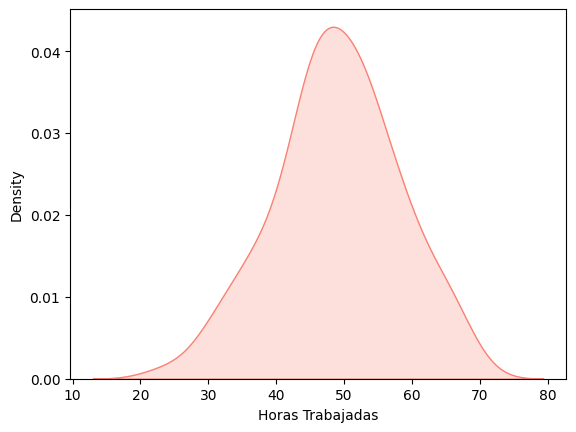

In [28]:
print(df["Horas Trabajadas"].skew())
sns.kdeplot(df["Horas Trabajadas"],fill=True,color="salmon")

Sesgo a la izquierda

#### Ventas Realizadas

0.18416478473351777


<Axes: xlabel='Ventas Realizadas', ylabel='Density'>

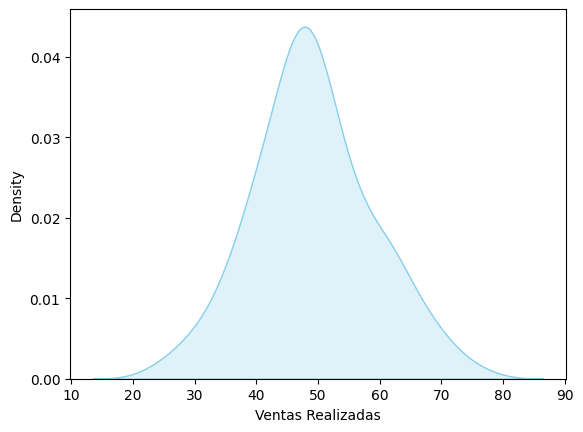

In [30]:
print(df["Ventas Realizadas"].skew())
sns.kdeplot(df["Ventas Realizadas"],fill=True,color="skyblue")

Sesgo a la derecha

6. **Cálculo de la curtosis**:
   - Calcula la **curtosis** para ambos conjuntos de datos. ¿Los conjuntos tienen una curtosis positiva, negativa o son mesocúrticos? 
   - Explica qué implica esto sobre la forma de la distribución.

#### Horas Trabajadas

In [31]:
df["Horas Trabajadas"].kurt()

np.float64(-0.10097745347286446)

#### Ventas Realizadas

In [32]:
df["Ventas Realizadas"].kurt()

np.float64(0.0767906900780515)

7. **Gráfico de dispersión**:
   - Crea un **gráfico de dispersión** entre **Horas Trabajadas** y **Ventas Realizadas**. 
   - ¿Hay alguna correlación entre ambas variables? Explica cómo interpretar la relación entre las dos variables.

<Axes: xlabel='Horas Trabajadas', ylabel='Ventas Realizadas'>

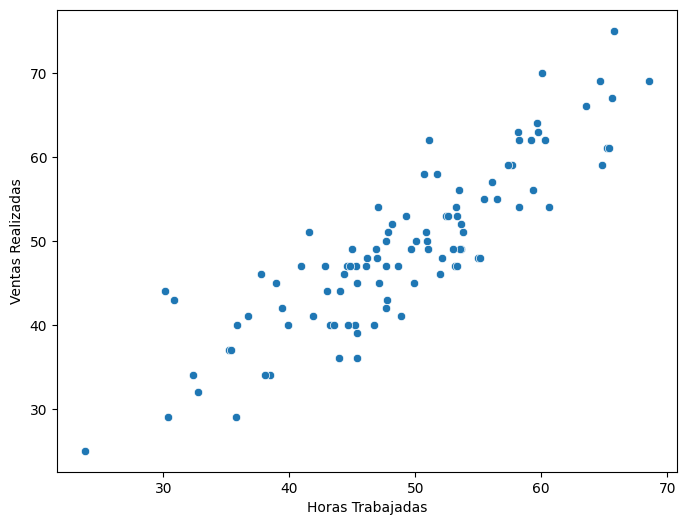

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Horas Trabajadas"],
                y=df["Ventas Realizadas"])

8. **Análisis exploratorio completo**:
   - Realiza un análisis exploratorio detallado de los datos, incluyendo todas las medidas calculadas en los ejercicios anteriores. Presenta los resultados en forma de un informe claro y visual con gráficos y tablas que resuman las características clave de los datos.


